# Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# Step 2: Loading And Processing the Data

In [2]:
# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Verifying  the shape of the data
print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [4]:
# Normalizing the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# One hot encoding  the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [6]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Step 3: Visualize a Single Image

In [17]:
# Selecting  a single image and its label 
single_img = train_images[42]
single_label = train_labels[42]

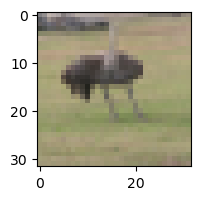

In [18]:
# Display the image
plt.figure(figsize=(2, 2))
plt.imshow(single_img)

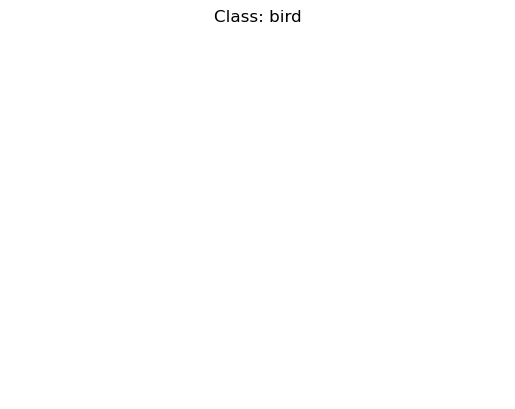

In [20]:
# Using  argmax to get the class index from oneh ot encoded label
plt.title(f'Class: {class_names[np.argmax(single_label)]}')
plt.axis('off')
plt.show()

# Step 4: Defining the CNN Mode

In [21]:
# Defining  the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Using  softmax activation for multi-class classification
])


# Step 5: Compiling  the Model

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Using  categorical crossentropy for one hot encoded labels
              metrics=['accuracy'])

# Step 6: Training the model

In [23]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


1563/1563 [==============================] - 25s 14ms/step - loss: 1.5141 - accuracy: 0.4530 - val_loss: 1.2861 - val_accuracy: 0.5366
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1550 - accuracy: 0.5890 - val_loss: 1.1112 - val_accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0176 - accuracy: 0.6410 - val_loss: 0.9941 - val_accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9230 - accuracy: 0.6771 - val_loss: 0.9754 - val_accuracy: 0.6587
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8572 - accuracy: 0.6992 - val_loss: 0.9659 - val_accuracy: 0.6652
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8006 - accuracy: 0.7187 - val_loss: 0.9029 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7508 - accuracy: 0.7359 - val_loss: 0.8894

# Step 7: Evaluating  the Model

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 0.8767 - accuracy: 0.7161 - 2s/epoch - 8ms/step

Test accuracy: 0.7160999774932861


# Step 8: Visualizing  Training Results

In [25]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

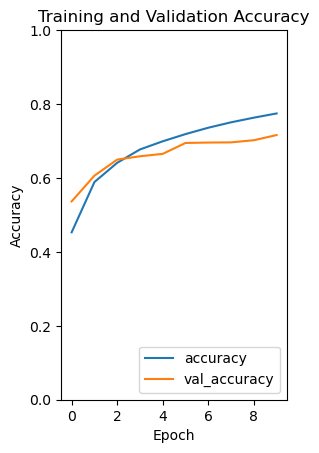

In [26]:
#ploting the trainging validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

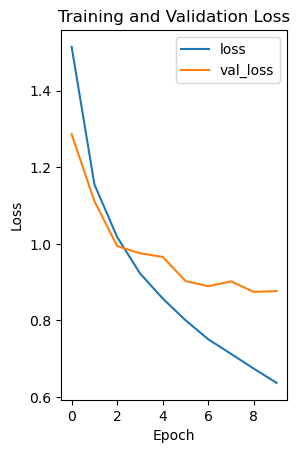

In [27]:
# Ploting the  training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Step 9: Making  Predictions and Displaying the  Results

In [28]:
# Making  predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 9ms/step


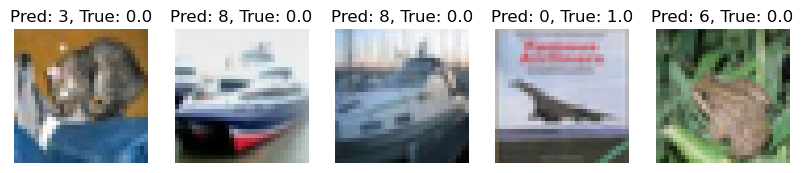

In [31]:
# Display the first 5 test images, their predicted labels, and the true labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f'Pred: {predicted_labels[i]}, True: {test_labels[i][0]}')
    plt.axis('off')
plt.show()

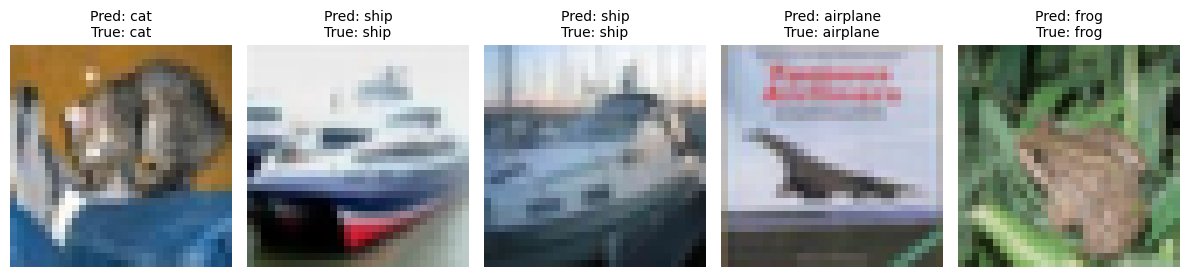

In [33]:
# Displaying  the first 5 test images to predicted their labels and the true labels
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[np.argmax(test_labels[i])]
    plt.title(f'Pred: {pred_label}\nTrue: {true_label}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()